# Import Libraries

In [519]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle 

In [520]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [522]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [523]:
df.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


# Customer ID

In [524]:
df.drop('customerID',axis = 1, inplace = True)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


# Total Charges

In [525]:
df.TotalCharges.describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [526]:
df[df['TotalCharges']==' '].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
OnlineBackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


In [527]:
len(df[df['TotalCharges']==' '])

11

In [528]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [529]:
len(df[df['TotalCharges']==' '])

0

In [530]:
df.iloc[[488,753,936],:]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No


# Missing Values

In [531]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [532]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<Axes: >

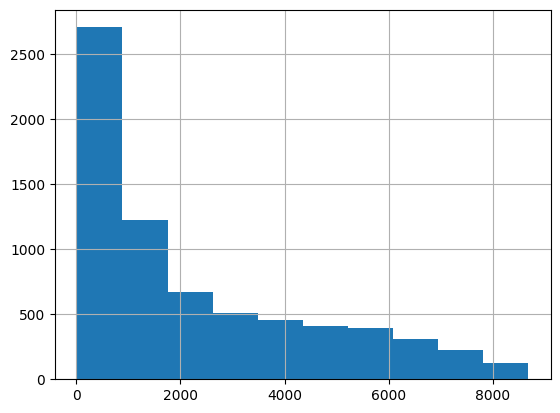

In [533]:
df['TotalCharges'].hist()

In [534]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges']).median()

In [535]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Some Cleaning

In [536]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [537]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [538]:
df[df.churn == 'Yes']

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1397.475,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1397.475,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1397.475,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1397.475,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,1397.475,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,1397.475,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,1397.475,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,1397.475,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,1397.475,Yes


Convert churn to Numerical Value

In [539]:
df.churn = (df.churn == 'Yes').astype(int)

In [540]:
df.churn.value_counts() #imbalance

churn
0    5174
1    1869
Name: count, dtype: int64

In [541]:
df.churn.value_counts(normalize= True)

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


# Data Splitting

We split the full data into : ( Training Set, Validation Set, Testing Set)
- Training Set: to traion our model
- Validation Set: to validate and tune the model(s)
- Testing Set: to evaluate the final model (after tuning and selecting the best one)

In [542]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.2, random_state=1)
print("Training Data Size: ", df_train.shape)
print("Validation Data Size: ", df_valid.shape)
print("Testing Data Size: ", df_test.shape)

Training Data Size:  (4507, 20)
Validation Data Size:  (1127, 20)
Testing Data Size:  (1409, 20)


# EDA

In [543]:
df['seniorcitizen'] = df['seniorcitizen'].astype('object')

In [544]:
categorical = list(df_train.select_dtypes(include=['object']).columns)
numerical = list(df_train.select_dtypes(include=['number']).columns)

In [545]:
numerical.remove('churn')

In [546]:
numerical

['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']

In [547]:
df_train[categorical].nunique()

gender              2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature Imprtance

It’s often done as a part of exploratory data analysis to figure out which variables will be useful for the model.

It also gives us additional insights about the dataset and helps answer questions like “What makes customers churn?” and “What are the characteristics of people who churn?”

# Risk Ratio

risk = group rate / global rate

a group with a risk close to 1 is not risky at all
a group with a risk lower than 1:, the clients in this group are less likely to churn than clients in general
a group with a risk higher than 1: there’s more churn in the group than in the population,

In [548]:
global_mean = df_train.churn.mean()
round(global_mean, 2)

np.float64(0.27)

In [549]:
churn_gender = df_train.groupby('gender').churn.mean()
churn_gender  # we can compare it with the global churn rate

gender
Female    0.274258
Male      0.261778
Name: churn, dtype: float64

the difference between the rates is small, the value is not important when predicting churn because this group of customers is not really different from the rest of the customers.

In [550]:
churn_partner = df_train.groupby('partner').churn.mean()
churn_partner

partner
No     0.325838
Yes    0.204651
Name: churn, dtype: float64

the difference is not small, something inside that group sets it apart from the rest. A machine learning algorithm should be able to pick this up and use it when making predictions.

In [551]:
gender_risk = churn_gender / global_mean
gender_risk

gender
Female    1.023245
Male      0.976682
Name: churn, dtype: float64

In [552]:
partner_risk = churn_partner / global_mean
partner_risk

partner
No     1.215688
Yes    0.763545
Name: churn, dtype: float64

In [553]:
for feature in categorical:                                           
    df_group = df_train.groupby(by=feature).churn.agg(['mean']) 
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
Female,0.274258,0.00623,1.023245
Male,0.261778,-0.00625,0.976682


,mean,diff,risk
partner,,,
No,0.325838,0.057810,1.215688
Yes,0.204651,-0.063376,0.763545


,mean,diff,risk
dependents,,,
No,0.312599,0.044572,1.166295
Yes,0.164454,-0.103573,0.613572


,mean,diff,risk
phoneservice,,,
No,0.249438,-0.018589,0.930644
Yes,0.270064,0.002036,1.007598


,mean,diff,risk
multiplelines,,,
No,0.253358,-0.014669,0.945269
No phone service,0.249438,-0.018589,0.930644
Yes,0.289017,0.020990,1.078312


,mean,diff,risk
internetservice,,,
DSL,0.195232,-0.072796,0.728403
Fiber optic,0.421779,0.153752,1.573641
No,0.080080,-0.187947,0.298776


,mean,diff,risk
onlinesecurity,,,
No,0.419964,0.151937,1.566869
No internet service,0.080080,-0.187947,0.298776
Yes,0.151090,-0.116937,0.563712


,mean,diff,risk
onlinebackup,,,
No,0.396020,0.127992,1.477535
No internet service,0.080080,-0.187947,0.298776
Yes,0.221629,-0.046399,0.826888


,mean,diff,risk
deviceprotection,,,
No,0.392514,0.124486,1.464454
No internet service,0.080080,-0.187947,0.298776
Yes,0.229915,-0.038112,0.857804


,mean,diff,risk
techsupport,,,
No,0.416554,0.148526,1.554145
No internet service,0.080080,-0.187947,0.298776
Yes,0.159599,-0.108428,0.595458


,mean,diff,risk
streamingtv,,,
No,0.344674,0.076646,1.285964
No internet service,0.080080,-0.187947,0.298776
Yes,0.297376,0.029349,1.109498


,mean,diff,risk
streamingmovies,,,
No,0.338609,0.070582,1.263338
No internet service,0.080080,-0.187947,0.298776
Yes,0.304198,0.036170,1.134950


,mean,diff,risk
contract,,,
Month-to-month,0.432509,0.164482,1.613674
One year,0.115822,-0.152205,0.432128
Two year,0.027027,-0.241000,0.100837


,mean,diff,risk
paperlessbilling,,,
No,0.171566,-0.096462,0.640106
Yes,0.336495,0.068467,1.255448


,mean,diff,risk
paymentmethod,,,
Bank transfer (automatic),0.164622,-0.103406,0.614197
Credit card (automatic),0.175620,-0.092408,0.655231
Electronic check,0.441215,0.173188,1.646157
Mailed check,0.199618,-0.068410,0.744767


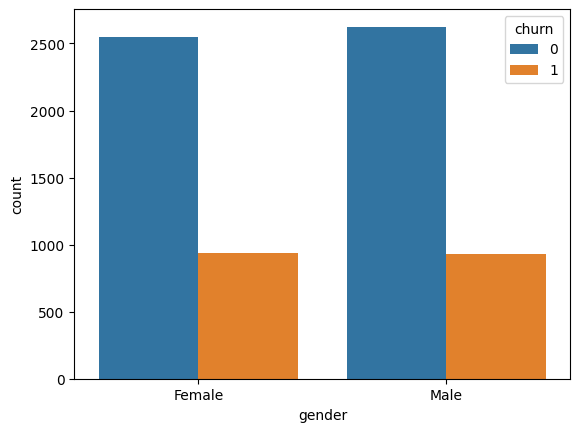

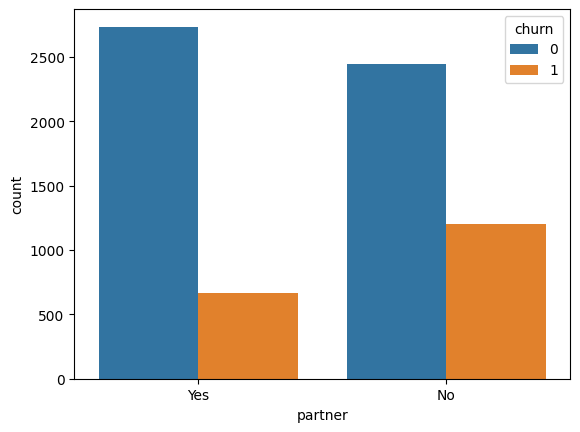

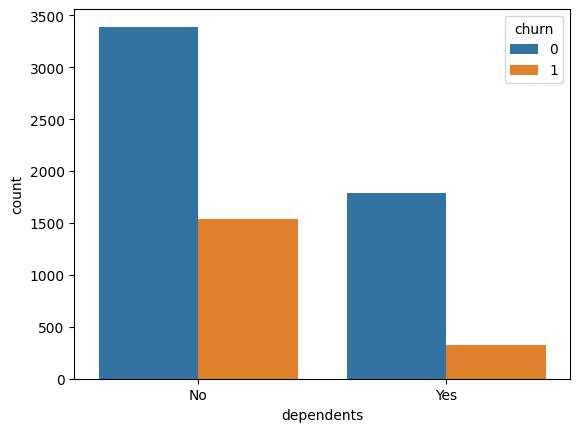

In [554]:
for feature in categorical[:3]:                                           
    _=sns.countplot(x= feature, hue = 'churn', data=df)
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


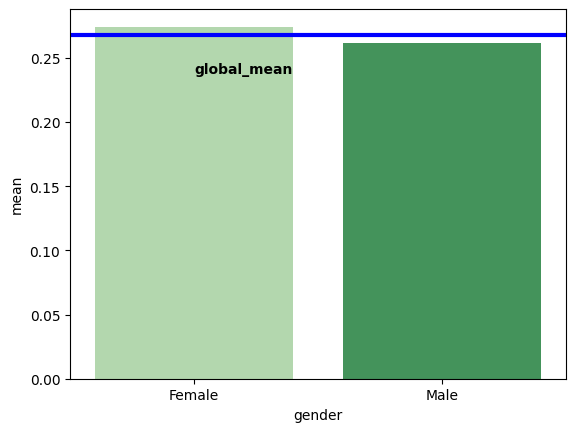

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


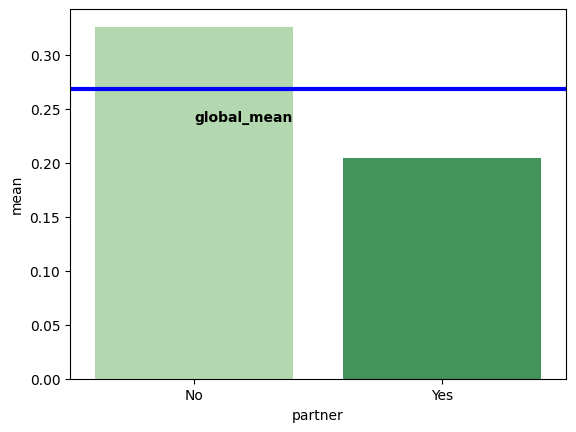

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


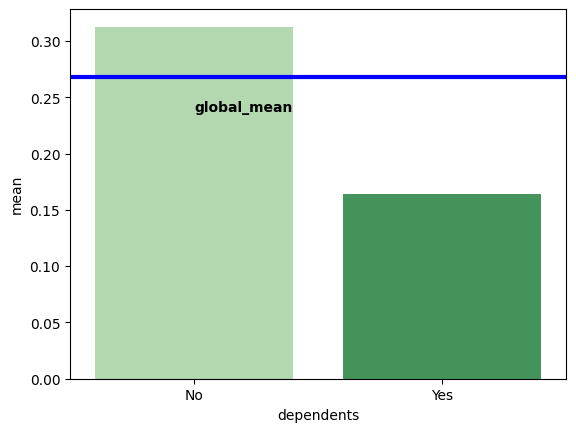

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


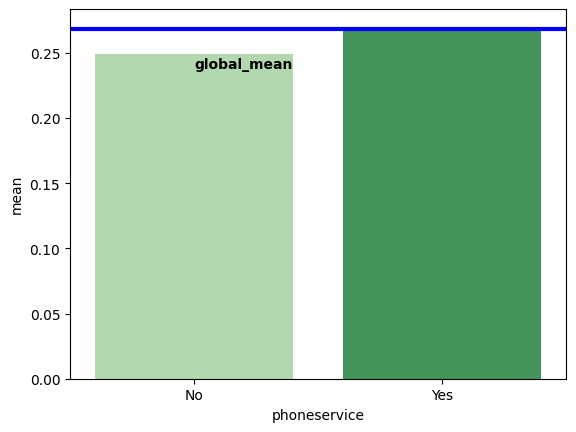

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


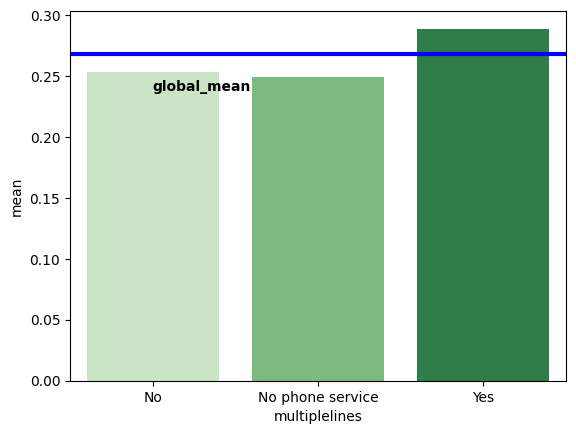

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


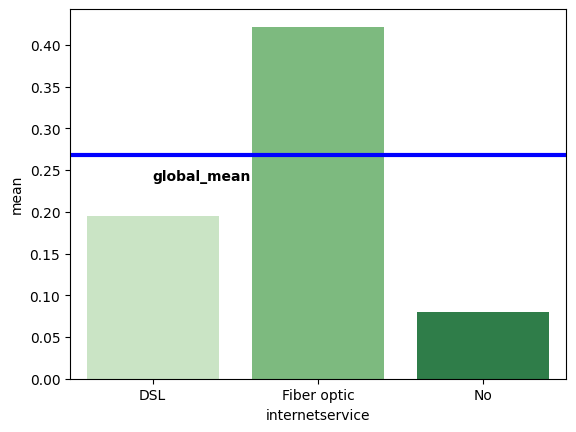

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


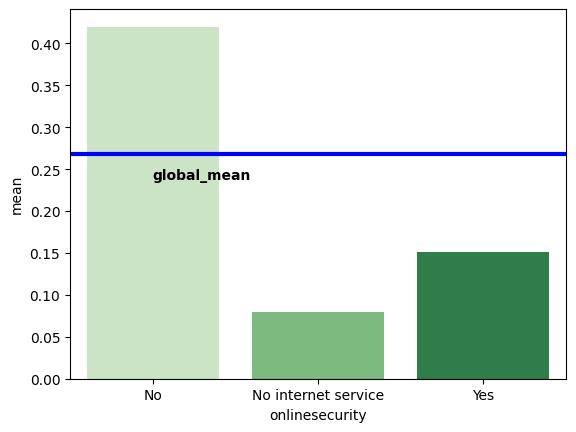

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


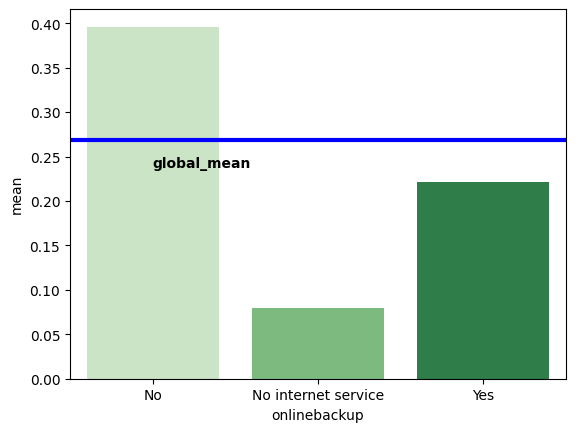

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


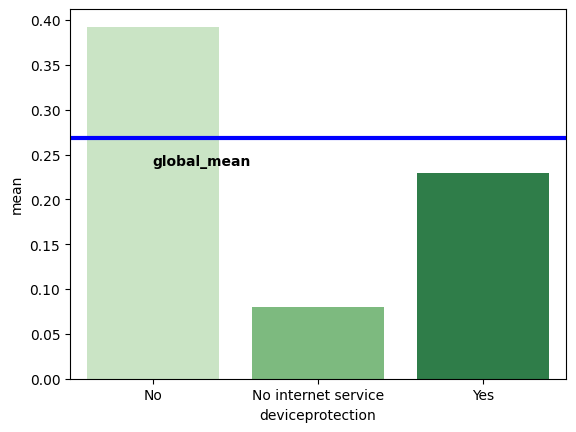

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


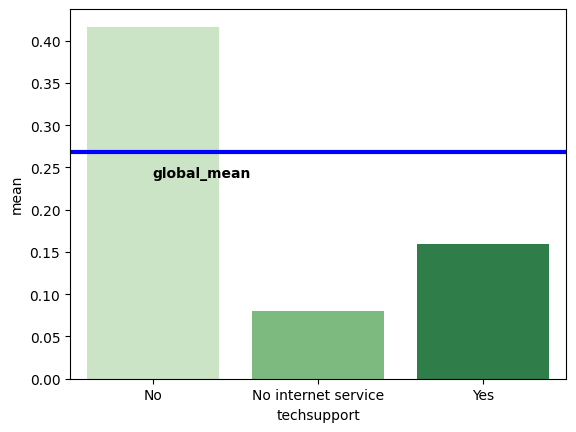

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


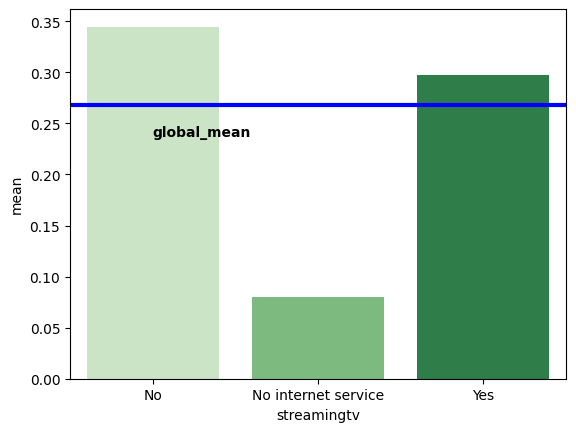

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


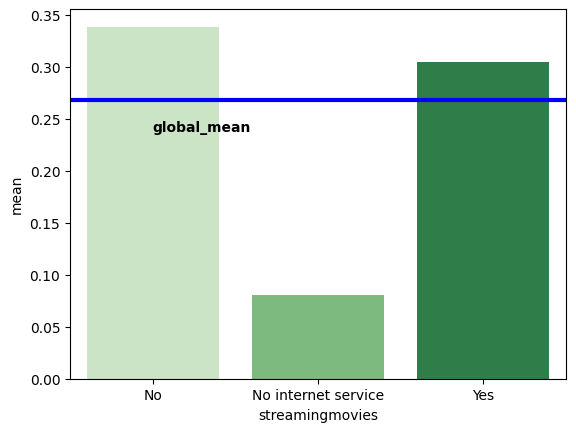

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


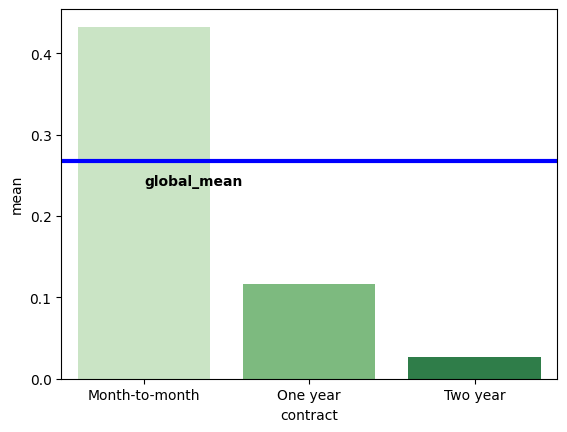

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


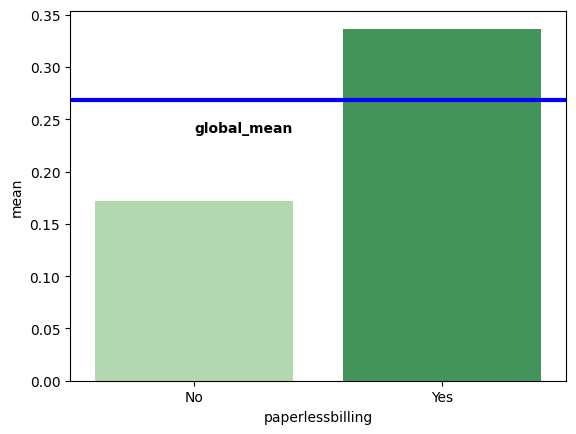

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


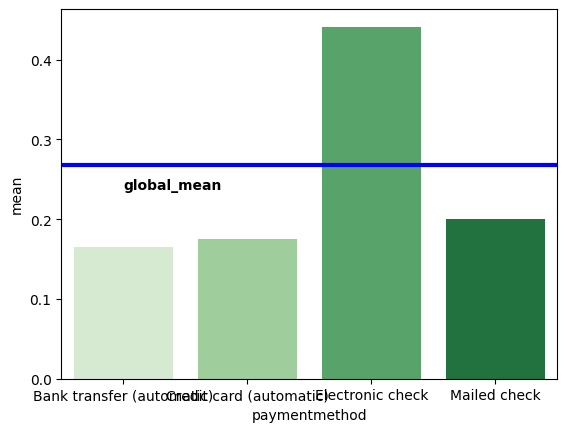

In [555]:
for feature in categorical:                                           
    df_group = df_train.groupby(by=feature).churn.agg(['mean']).reset_index()
    graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')
    graph.axhline(global_mean, linewidth=3, color='b')
    plt.text(0, global_mean - 0.03, "global_mean", color='black', weight='semibold')
    plt.show()

## Some insights

For gender, there is not much difference between females and males.
Senior citizens tend to churn more than nonseniors.

People with a partner churn less than people with no partner.

People who use phone service are not at risk of churning. People who don’t use phone service are even less likely to churn.

Clients with no tech support tend to churn more than those who do.

People with monthly contracts cancel the contract a lot more often than others, and people with two-year contacts churn very rarely.

# Mutual Information

More efficient to compare features importance
Mutual information is a way to quantify the degree of dependency between two categorical variables, but it doesn’t work when one of the features is numerical
MI(feature;target) = Entropy(feature) - Entropy(feature|target)

In [556]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.churn)

df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.100378
onlinesecurity,0.062802
techsupport,0.059945
internetservice,0.053951
onlinebackup,0.044230


,MI
dependents,0.012528
partner,0.009443
multiplelines,0.000821
gender,0.000099
phoneservice,0.000098


Higher values of mutual information mean a higher degree of dependence: if the mutual information between a categorical variable and the target is high, this categorical variable will be quite useful for predicting the target.

On the other hand, if the mutual information is low, the categorical variable and the target are independent, and thus the variable will not be useful for predicting the target.

# Correlation Coefficient

- The correlation coefficient (Pearson’s correlation coefficient). It is a value from –1 to 1
- Positive correlation means that when one variable goes up, the other variable tends to go up as well (In the case of a binary target, when the values of the variable are high, we see ones more often than zeros. But when the values of the variable are low, zeros become more frequent than ones.)
- Zero correlation means no relationship between two variables: they are completely independent.
- Negative correlation occurs when one variable goes up and the other goes down. (In the binary case, if the values are high, we see more zeros than ones in the target variable. When the values are low, we see more ones.)

In [557]:
df[numerical].corrwith(df.churn)

seniorcitizen     1.508893e-01
tenure           -3.522287e-01
monthlycharges    1.933564e-01
totalcharges      1.525189e-16
dtype: float64

The correlation between tenure and churn is –0.35: it has a negative sign, so the longer customers stay, the less often they tend to churn

In [558]:
t1 =df[df['tenure'] <= 2].churn.mean()
t1

np.float64(0.5835266821345708)

In [559]:
t2 = df[(df.tenure >= 3) & (df.tenure <= 12)].churn.mean()
t2 

np.float64(0.4033232628398791)

In [560]:
t3 = df[df['tenure'] >= 12].churn.mean()
t3

np.float64(0.17490952955367914)

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\2249406301.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =['1-2', '3-12', '+12'], y =[t1,t2,t3], palette='Greens');


Text(0, 0.5, 'Churn Rate')

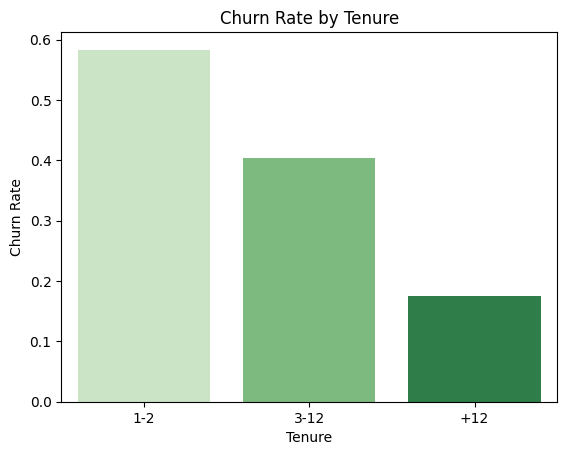

In [561]:
sns.barplot(x =['1-2', '3-12', '+12'], y =[t1,t2,t3], palette='Greens');
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')

monthlycharges has a positive coefficient of 0.19, which means that customers who pay more tend to leave more often.

In [562]:
mc1 =df[df['monthlycharges'] <= 20].churn.mean()
mc1

np.float64(0.08841463414634146)

In [563]:
mc2 = df[(df.monthlycharges >= 21) & (df.monthlycharges <= 50)].churn.mean()
mc2

np.float64(0.22807017543859648)

In [564]:
mc3 = df[df['monthlycharges'] > 50].churn.mean()
mc3

np.float64(0.3178752107925801)

C:\Users\hp\AppData\Local\Temp\ipykernel_19548\2360169293.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =['0-20', '21-50', '+50'], y =[mc1,mc2,mc3], palette='Greens');


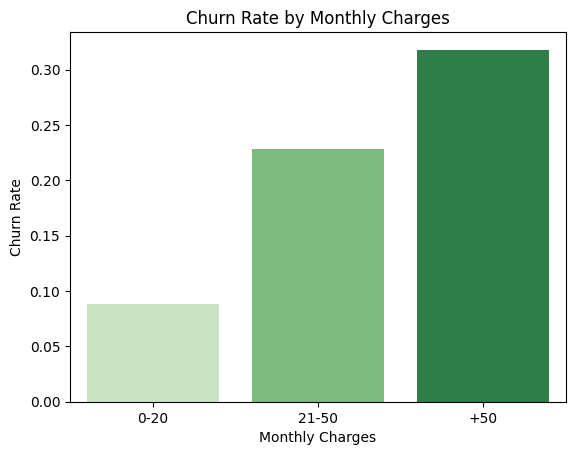

In [565]:
sns.barplot(x =['0-20', '21-50', '+50'], y =[mc1,mc2,mc3], palette='Greens');
plt.title('Churn Rate by Monthly Charges');
plt.xlabel('Monthly Charges');
plt.ylabel('Churn Rate');

# Preprocessing

Handling Categorical Variables one-hot encoding

In [566]:
# Applying one hot encoding using Sklearn
ohe = OneHotEncoder(drop='first')

transformer = make_column_transformer((ohe, categorical), remainder='passthrough',
                                      verbose_feature_names_out=False)

train_enc = transformer.fit_transform(df_train)
df_train_enc = pd.DataFrame(train_enc, columns=transformer.get_feature_names_out())
df_train_enc

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,...,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,seniorcitizen,tenure,monthlycharges,totalcharges,churn
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,30.0,19.70,1397.475,0.0
1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,23.0,83.75,1397.475,0.0
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,14.0,95.80,1397.475,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,56.0,19.70,1397.475,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,63.0,98.00,1397.475,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,52.0,80.85,1397.475,0.0
4503,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,18.0,25.15,1397.475,0.0
4504,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,90.00,1397.475,1.0
4505,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,27.0,24.50,1397.475,0.0


In [567]:
X_train = df_train_enc.drop('churn', axis=1)
y_train = df_train_enc['churn']

In [568]:
valid_enc = transformer.transform(df_valid)
df_valid_enc = pd.DataFrame(valid_enc, columns=transformer.get_feature_names_out())
X_valid = df_valid_enc.drop('churn', axis=1)
y_valid = df_valid_enc['churn']

test_enc = transformer.transform(df_test)
df_test_enc = pd.DataFrame(test_enc, columns=transformer.get_feature_names_out())
X_test = df_test_enc.drop('churn', axis=1)
y_test = df_test_enc['churn']

Scaling Numerical Variables Standard Scaler

In [569]:
df_train[numerical].describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,4507.000000,4507.000000,4507.000000,4.507000e+03
mean,0.164633,32.001553,64.312536,1.397475e+03
std,0.370890,24.558539,30.089423,2.273989e-13
min,0.000000,0.000000,18.250000,1.397475e+03
25%,0.000000,8.000000,34.700000,1.397475e+03
50%,0.000000,28.000000,70.150000,1.397475e+03
75%,0.000000,55.000000,89.575000,1.397475e+03
max,1.000000,72.000000,118.350000,1.397475e+03


In [570]:
scaler = StandardScaler()

scaler.fit_transform(df_train[numerical])

array([[-4.43935078e-01, -8.15103549e-02, -1.48282956e+00,
        -2.27373675e-13],
       [-4.43935078e-01, -3.66575224e-01,  6.46061595e-01,
        -2.27373675e-13],
       [ 2.25258163e+00, -7.33087199e-01,  1.04657898e+00,
        -2.27373675e-13],
       ...,
       [-4.43935078e-01, -1.22176983e+00,  8.53798827e-01,
        -2.27373675e-13],
       [-4.43935078e-01, -2.03681013e-01, -1.32328737e+00,
        -2.27373675e-13],
       [ 2.25258163e+00, -9.36704963e-01,  5.49671519e-01,
        -2.27373675e-13]])

In [571]:
# Transformers
def preprocess(df_train, df_valid, df_test, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    X_train = transformer.fit_transform(df_train[cat+num])
    X_valid = transformer.transform(df_valid[cat+num])
    X_test = transformer.transform(df_test[cat+num])
    columns=transformer.get_feature_names_out()
   
    return X_train , X_valid, X_test, columns

In [572]:
X_train , X_valid, X_test, columns = preprocess(df_train, df_valid, df_test, numerical, categorical)

In [573]:
X_train

array([[-0.44393508, -0.08151035, -1.48282956, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44393508, -0.36657522,  0.64606159, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.25258163, -0.7330872 ,  1.04657898, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.44393508, -1.22176983,  0.85379883, ...,  1.        ,
         0.        ,  0.        ],
       [-0.44393508, -0.20368101, -1.32328737, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.25258163, -0.93670496,  0.54967152, ...,  0.        ,
         1.        ,  0.        ]])

In [574]:
y_train = df_train['churn']
y_valid = df_valid['churn']
y_test = df_test['churn']

# Modeling

We will use logistic regression as a classification model

In [575]:
model_1 = LogisticRegression(solver='liblinear', random_state=1)
model_1.fit(X_train, y_train)  # ====> Weights

LogisticRegression(random_state=1, solver='liblinear')

In [576]:
y_val_pred = model_1.predict_proba(X_valid)
y_val_pred

array([[0.99095443, 0.00904557],
       [0.82639377, 0.17360623],
       [0.81478013, 0.18521987],
       ...,
       [0.93581928, 0.06418072],
       [0.4059402 , 0.5940598 ],
       [0.6743759 , 0.3256241 ]])

In [577]:
y_test_pred = model_1.predict_proba(X_test)
y_test_pred

array([[0.93863725, 0.06136275],
       [0.92480229, 0.07519771],
       [0.68178542, 0.31821458],
       ...,
       [0.9908159 , 0.0091841 ],
       [0.81643414, 0.18356586],
       [0.3627354 , 0.6372646 ]])

In [578]:
y_test_pred[:,1]

array([0.06136275, 0.07519771, 0.31821458, ..., 0.0091841 , 0.18356586,
       0.6372646 ])

This output (probabilities) is often called soft predictions. These tell us the probability of churning as a number between zero and one. It’s up to us to decide how to interpret this number and how to use it.

To get the binary predictions, hard predictions, we take the probabilities and cut them above a certain threshold

In [579]:
y_test_pred[:,1] > 0.5

array([False, False, False, ..., False, False,  True])

In [580]:
y_test_pred = (y_test_pred[:,1] > 0.5).astype(int)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [581]:
y_pred = model_1.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [582]:
y_test_pred == y_test

3381     True
6180     True
4829     True
3737    False
4249     True
        ...  
2563     True
2028     True
2899     True
3474     True
5154     True
Name: churn, Length: 1409, dtype: bool

In [583]:
(y_test_pred == y_test).mean()

np.float64(0.8055358410220014)

In [584]:
print('LogisticRegression Training Accuracy: ', round(model_1.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_1.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_1.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.8
LogisticRegression Validation Accuracy:  0.81
LogisticRegression Testing Accuracy:  0.81


# Repeat Training and Evaluation for Most Important Features

In [585]:
important_cat = df_mi.head().index.to_list()
important_cat

['contract',
 'onlinesecurity',
 'techsupport',
 'internetservice',
 'onlinebackup']

In [586]:
X_train, X_valid, X_test, columns = preprocess(df_train, df_valid, df_test, numerical, important_cat)

model_2 = LogisticRegression(solver='liblinear', random_state=1)
model_2.fit(X_train, y_train)
print('LogisticRegression Training Accuracy: ', round(model_2.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_2.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_2.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.79
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.8


# Using Numerical Features Only

In [587]:
X_train = df_train[numerical]
X_valid = df_valid[numerical]
X_test  = df_test[numerical]

model_3 = LogisticRegression(solver='liblinear', random_state=1)
model_3.fit(X_train, y_train)
print('LogisticRegression Training Accuracy: ', round(model_3.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_3.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_3.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.79
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.8


# Model Saving

In [588]:
pickle.dump(model_2, open("log_reg.pkl", 'wb'))

# Model Loading

In [589]:
loaded_model = pickle.load(open('log_reg.pkl', 'rb'))

# Model Usage

In [590]:
df_test[important_cat + numerical].iloc[10]

contract           Month-to-month
onlinesecurity                 No
techsupport                    No
internetservice       Fiber optic
onlinebackup                  Yes
seniorcitizen                   1
tenure                         32
monthlycharges              93.95
totalcharges             1397.475
Name: 407, dtype: object

In [591]:
# Transformers
def preprocess_fit(df_train, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    transformer.fit(df_train[cat+num])
    return transformer

In [592]:
transformer = preprocess_fit(df_train, numerical, important_cat)

In [593]:
df_test.iloc[11][important_cat + numerical]

contract              One year
onlinesecurity              No
techsupport                 No
internetservice    Fiber optic
onlinebackup               Yes
seniorcitizen                0
tenure                      68
monthlycharges          101.05
totalcharges          1397.475
Name: 6947, dtype: object

In [594]:
pd.DataFrame(df_test.iloc[11][important_cat + numerical]).T

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,seniorcitizen,tenure,monthlycharges,totalcharges
6947,One year,No,No,Fiber optic,Yes,0,68,101.05,1397.475


In [595]:
x =transformer.transform(pd.DataFrame(df_test.iloc[11][important_cat + numerical]).T)
x

array([[-4.43935078e-01,  1.46598465e+00,  1.22107825e+00,
        -2.27373675e-13,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00]])

In [596]:
loaded_model.predict(x)

array([0])

In [597]:
y_test.iloc[11]

np.int64(0)

In [598]:
x = df_test.iloc[11][important_cat + numerical].to_dict()

In [599]:
x

{'contract': 'One year',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'Yes',
 'seniorcitizen': 0,
 'tenure': 68,
 'monthlycharges': 101.05,
 'totalcharges': 1397.475}

In [600]:
x = pd.DataFrame(x, index=[0])
x

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,seniorcitizen,tenure,monthlycharges,totalcharges
0,One year,No,No,Fiber optic,Yes,0,68,101.05,1397.475


In [601]:
transformer.transform(x)

array([[-4.43935078e-01,  1.46598465e+00,  1.22107825e+00,
        -2.27373675e-13,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00]])

# Transformer Saving

In [602]:
pickle.dump(transformer, open("transformer.pkl", 'wb'))

# Inference

In [612]:
trans = pickle.load(open('transformer.pkl', 'rb'))
model = pickle.load(open('log_reg.pkl', 'rb'))

In [613]:
cust ={'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'Yes',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [614]:
pd.DataFrame(cust, index=[0])

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [620]:
cust = trans.transform(pd.DataFrame(cust, index=[0]))

In [621]:
cust

array([[-4.43935078e-01, -6.32493609e-05,  9.85088758e-01,
         1.46397500e+03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00]])

In [622]:
model.predict(cust)[0]

np.int64(0)

In [623]:
if model.predict(cust)[0] == 0:
    print('Not Churn')
else:
    print('Churn')

Not Churn
